In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA




In [41]:
df = pd.read_csv("/content/drive/Othercomputers/My Laptop/Apziva Projects/Term Deposit Marketing/term-deposit-marketing-2020.csv")

In [42]:
df['y'] = df['y'].str.replace('yes','1').str.replace('no','0').astype(int)
df['default'] = df['default'].str.replace('yes','1').str.replace('no','0').astype(int)
df['housing'] = df['housing'].str.replace('yes','1').str.replace('no','0').astype(int)
df['loan'] = df['loan'].str.replace('yes','1').str.replace('no','0').astype(int)
df['marital'] = df['marital'].str.replace('single','0').str.replace('married','1').str.replace('divorced','2').astype(int)
df['education'] = df['education'].str.replace('unknown','0').str.replace('primary','1').str.replace('secondary','2').str.replace('tertiary','3').astype(int)
df['contact'] = df['contact'].str.replace('unknown','0').str.replace('cellular','1').str.replace('telephone','2').astype(int)

month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov':11, 'dec': 12,
}
df['month'] = df['month'].map(month_mapping).astype(int)

job_mapping = {
    'unknown': 0, 'unemployed': 1, 'self-employed': 2, 'admin': 3, 'blue-collar': 4, 'entrepreneur': 5, 'management': 6, 'retired': 7, 'services': 8, 'student': 9, 'technician': 10, 'housemaid': 11,
}
df['job'] = df['job'].map(job_mapping).astype(int)


In [43]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,5.93665,0.845900,2.046850,0.020225,1274.277550,0.600775,0.173250,0.738900,16.017225,6.009800,254.824300,2.882175,0.072400
std,9.641776,2.72220,0.605485,0.766694,0.140771,2903.769716,0.489745,0.378468,0.555864,8.278127,2.301095,259.366498,3.239051,0.259152
min,19.000000,0.00000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,4.00000,0.000000,2.000000,0.000000,54.000000,0.000000,0.000000,0.000000,8.000000,5.000000,100.000000,1.000000,0.000000
50%,39.000000,6.00000,1.000000,2.000000,0.000000,407.000000,1.000000,0.000000,1.000000,17.000000,6.000000,175.000000,2.000000,0.000000
75%,48.000000,8.00000,1.000000,3.000000,0.000000,1319.000000,1.000000,0.000000,1.000000,21.000000,7.000000,313.000000,3.000000,0.000000
max,95.000000,11.00000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,12.000000,4918.000000,63.000000,1.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        40000 non-null  int64
 1   job        40000 non-null  int64
 2   marital    40000 non-null  int64
 3   education  40000 non-null  int64
 4   default    40000 non-null  int64
 5   balance    40000 non-null  int64
 6   housing    40000 non-null  int64
 7   loan       40000 non-null  int64
 8   contact    40000 non-null  int64
 9   day        40000 non-null  int64
 10  month      40000 non-null  int64
 11  duration   40000 non-null  int64
 12  campaign   40000 non-null  int64
 13  y          40000 non-null  int64
dtypes: int64(14)
memory usage: 4.3 MB


In [45]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,6,1,3,0,2143,1,0,0,5,5,261,1,0
1,44,10,0,2,0,29,1,0,0,5,5,151,1,0
2,33,5,1,2,0,2,1,1,0,5,5,76,1,0
3,47,4,1,0,0,1506,1,0,0,5,5,92,1,0
4,33,0,0,0,0,1,0,0,0,5,5,198,1,0


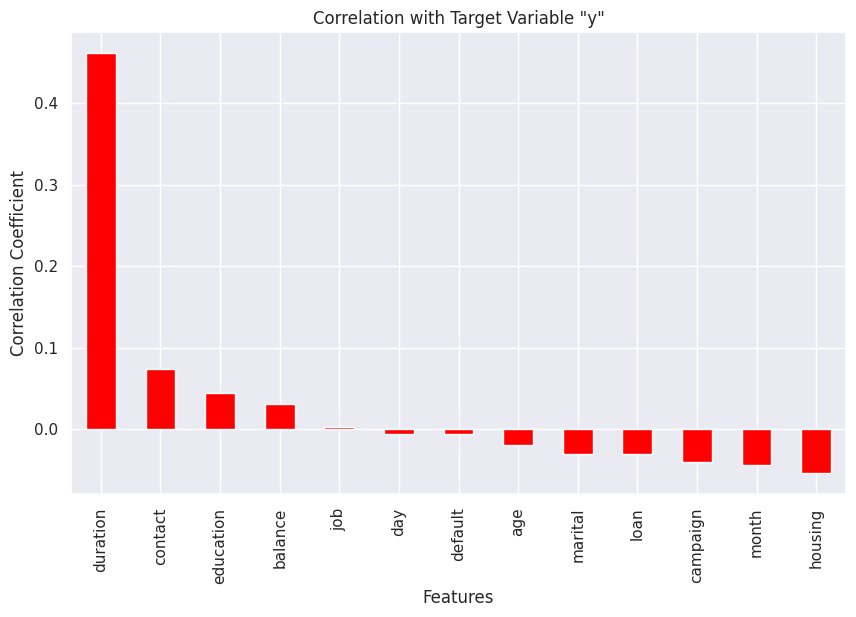

In [46]:
corr = df.corr()['y'].sort_values(ascending = False)[1:]
plt.figure(figsize=(10, 6))
corr.plot(kind='bar', color='red')
plt.title('Correlation with Target Variable "y"')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()

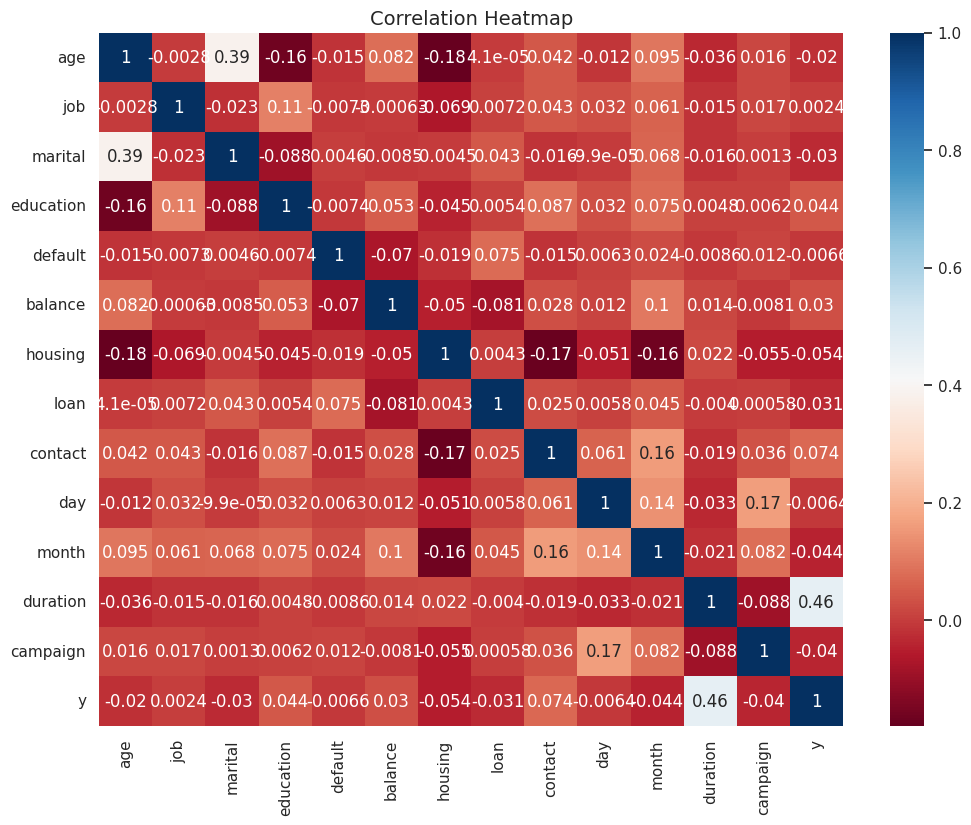

In [47]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

In [61]:
#df_x = df.drop('y',axis =1)
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

df_std = pd.DataFrame(data = df_std,columns = df.columns)


In [62]:
df_std

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,1.810415,0.023272,0.254510,1.243210,-0.143675,0.299174,0.815179,-0.457772,-1.329299,-1.330900,-0.438840,0.023811,-0.581096,-0.279376
1,0.358382,1.492690,-1.397079,-0.061107,-0.143675,-0.428854,0.815179,-0.457772,-1.329299,-1.330900,-0.438840,-0.400305,-0.581096,-0.279376
2,-0.782501,-0.344083,0.254510,-0.061107,-0.143675,-0.438152,0.815179,2.184492,-1.329299,-1.330900,-0.438840,-0.689474,-0.581096,-0.279376
3,0.669532,-0.711437,0.254510,-2.669742,-0.143675,0.079802,0.815179,-0.457772,-1.329299,-1.330900,-0.438840,-0.627785,-0.581096,-0.279376
4,-0.782501,-2.180855,-1.397079,-2.669742,-0.143675,-0.438497,-1.226725,-0.457772,-1.329299,-1.330900,-0.438840,-0.219092,-0.581096,-0.279376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1.291832,1.492690,0.254510,1.243210,-0.143675,-0.302809,-1.226725,-0.457772,0.469725,-1.572504,-0.004259,-0.569951,-0.581096,-0.279376
39996,-1.093650,0.023272,-1.397079,1.243210,-0.143675,0.711402,-1.226725,-0.457772,0.469725,-1.572504,-0.004259,-0.064868,0.036377,3.579407
39997,1.395549,-1.078792,1.906098,-0.061107,-0.143675,-0.369964,-1.226725,-0.457772,0.469725,-1.572504,-0.004259,-0.327048,-0.581096,3.579407
39998,-0.678784,0.023272,0.254510,1.243210,-0.143675,-0.078271,-1.226725,-0.457772,0.469725,-1.572504,-0.004259,0.336114,-0.581096,-0.279376


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

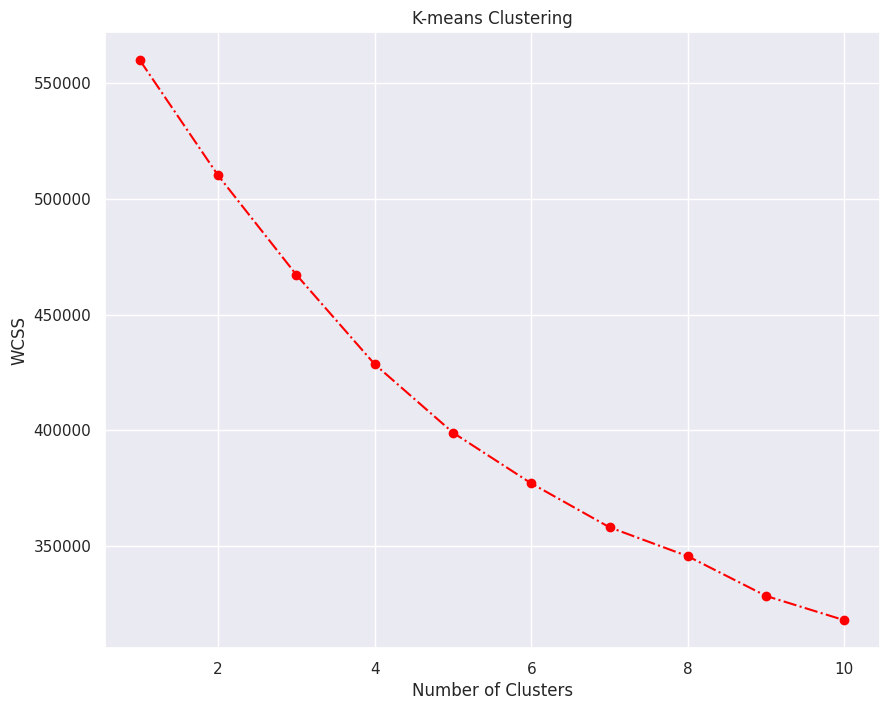

In [50]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)


plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [51]:
kmeans = KMeans(n_clusters = 9, init = 'k-means++', random_state = 42)

In [52]:
kmeans.fit(df_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9, random_state=42)

In [53]:
df_segm_kmeans= df_std.copy()
df_segm_kmeans = pd.DataFrame(data = df_std,columns = df.columns)
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [54]:
df_segm_kmeans.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,Segment K-means
0,1.810415,0.023272,0.254510,1.243210,-0.143675,0.299174,0.815179,-0.457772,-1.329299,-1.3309,-0.43884,0.023811,-0.581096,-0.279376,5
1,0.358382,1.492690,-1.397079,-0.061107,-0.143675,-0.428854,0.815179,-0.457772,-1.329299,-1.3309,-0.43884,-0.400305,-0.581096,-0.279376,3
2,-0.782501,-0.344083,0.254510,-0.061107,-0.143675,-0.438152,0.815179,2.184492,-1.329299,-1.3309,-0.43884,-0.689474,-0.581096,-0.279376,0
3,0.669532,-0.711437,0.254510,-2.669742,-0.143675,0.079802,0.815179,-0.457772,-1.329299,-1.3309,-0.43884,-0.627785,-0.581096,-0.279376,5
4,-0.782501,-2.180855,-1.397079,-2.669742,-0.143675,-0.438497,-1.226725,-0.457772,-1.329299,-1.3309,-0.43884,-0.219092,-0.581096,-0.279376,2


In [55]:
df_segm_analysis = df_std.groupby(['Segment K-means']).mean()
df_segm_analysis

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
Segment K-means,,,,,,,,,,,,,,
0,0.014297,0.021387,0.100092,0.012494,-0.143675,-0.192319,0.035316,2.184492,0.035078,-0.010657,0.083909,-0.126158,-0.130585,-0.279376
1,0.262583,-0.005892,-0.032942,0.373001,-0.143675,5.457339,-0.207332,-0.320617,0.096187,0.022448,0.510604,-0.084069,-0.060251,-0.108529
2,0.791191,-0.081717,0.432835,-0.492178,-0.143675,-0.028058,-1.226725,-0.455216,-0.240416,-0.266265,-0.141075,-0.171790,-0.124563,-0.277883
3,-0.859139,0.109099,-1.166574,0.320962,-0.143675,-0.117761,0.277584,-0.455833,-0.057520,-0.125489,-0.599369,-0.106218,-0.197826,-0.279376
4,0.033676,0.291798,0.081905,0.451876,-0.143675,0.022524,-0.400041,-0.455839,0.684597,0.504502,1.197455,-0.184382,0.022232,-0.279376
5,0.163151,-0.250605,0.501825,-0.359428,-0.143675,-0.128384,0.815179,-0.457772,-0.413734,-0.203021,-0.434115,-0.087804,-0.165077,-0.279376
6,-0.101796,-0.049472,0.033753,-0.051422,6.960155,-0.488228,-0.135014,0.519996,-0.106942,0.041575,0.170004,-0.058817,0.071912,-0.045366
7,-0.072921,0.004207,-0.107332,0.161958,-0.143675,0.050868,-0.189059,-0.118171,0.262314,-0.026780,-0.158656,1.779499,-0.163963,3.493387
8,-0.021030,0.029516,-0.040250,0.028803,-0.136967,-0.112024,-0.181671,-0.033613,0.046725,0.809082,0.322395,-0.487829,4.429235,-0.246582


In [57]:
pca = PCA()

In [58]:
pca.fit(df_std)

PCA()

In [59]:
pca.explained_variance_ratio_

array([0.28289801, 0.08700329, 0.07905963, 0.07585966, 0.06256754,
       0.05571974, 0.05321685, 0.05173511, 0.04861413, 0.04586015,
       0.04396631, 0.04229133, 0.02999651, 0.02966996, 0.01154178])

Text(0, 0.5, 'Cumulative Explained Variance')

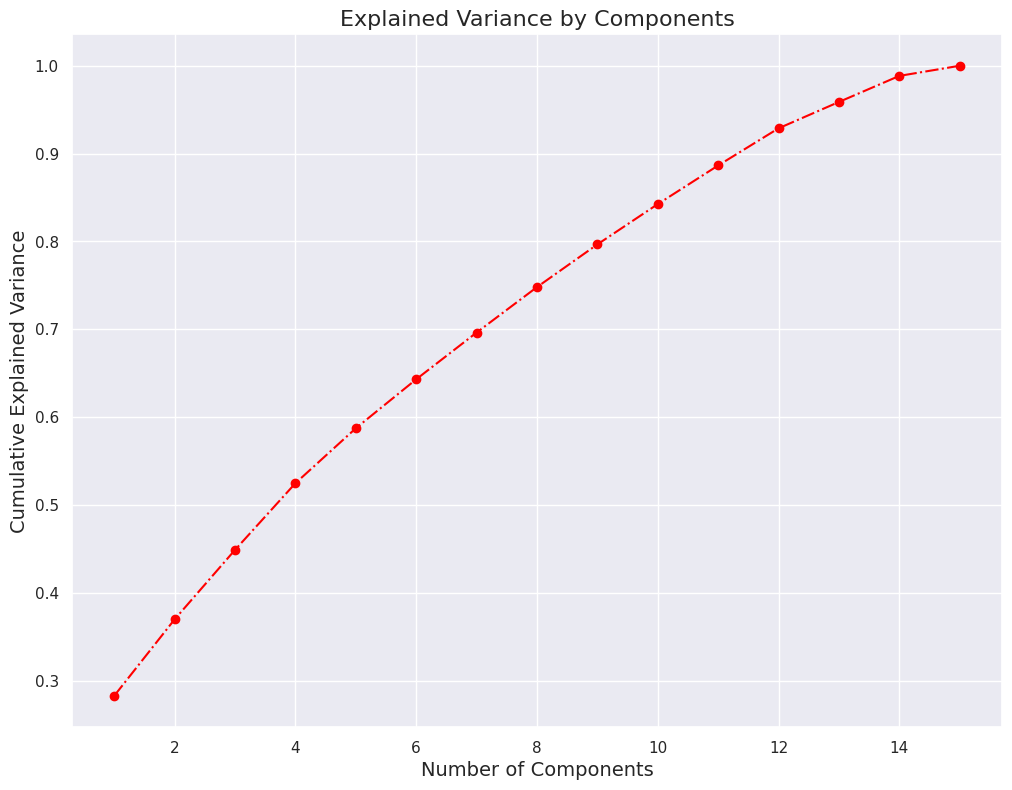

In [65]:
plt.figure(figsize = (12,9))
plt.plot(range(1,16), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '-.',color='red')
plt.title('Explained Variance by Components',fontsize=16)
plt.xlabel('Number of Components',fontsize=14)
plt.ylabel('Cumulative Explained Variance',fontsize=14)

In [66]:
pca = PCA(n_components = 14)

In [67]:
pca.fit(df_std)

PCA(n_components=14)

In [68]:
pca.components_

array([[ 4.60008481e-01,  1.05784888e-01,  3.51085626e-01,
        -2.79889418e-02,  1.80487145e-02,  1.35937648e-01,
        -3.70927123e-01,  6.38816046e-02,  2.64659693e-01,
         2.32610914e-01,  4.19998271e-01, -2.89138816e-01,
         2.36530413e-01, -2.29315583e-01],
       [-5.19503950e-02,  1.58877923e-01, -1.32796570e-01,
         2.77178774e-01, -4.12180392e-02,  1.81458742e-01,
        -2.85981214e-01, -4.62391871e-02,  3.27451020e-01,
         1.26968570e-01,  2.26705488e-01,  5.03039539e-01,
         1.86395317e-03,  5.75546369e-01],
       [ 4.84806131e-01, -2.02595171e-01,  4.74901627e-01,
        -3.77140332e-01, -3.62061124e-02,  3.10075356e-02,
         1.60006579e-02, -2.35609119e-02, -1.47213883e-01,
        -2.48475591e-01, -1.43980124e-01,  3.37297525e-01,
        -2.31240130e-01,  2.85804826e-01],
       [ 5.64140219e-02,  1.15223973e-02, -8.84535784e-02,
         7.88289601e-02, -5.41847882e-01,  5.36449461e-01,
        -1.19217170e-02, -5.66156178e-01, -3.

In [72]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns,
                           index=np.arange(1, 15))
df_pca_comp

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
1,0.460008,0.105785,0.351086,-0.027989,0.018049,0.135938,-0.370927,0.063882,0.264660,0.232611,0.419998,-0.289139,0.236530,-0.229316
2,-0.051950,0.158878,-0.132797,0.277179,-0.041218,0.181459,-0.285981,-0.046239,0.327451,0.126969,0.226705,0.503040,0.001864,0.575546
3,0.484806,-0.202595,0.474902,-0.377140,-0.036206,0.031008,0.016001,-0.023561,-0.147214,-0.248476,-0.143980,0.337298,-0.231240,0.285805
4,0.056414,0.011522,-0.088454,0.078829,-0.541848,0.536449,-0.011922,-0.566156,-0.031212,-0.151333,-0.044298,-0.146188,-0.138657,-0.118994
5,-0.047807,-0.333856,-0.022888,-0.282853,-0.108476,0.030473,0.177289,-0.256951,-0.184812,0.551343,-0.012379,0.135104,0.565838,0.137334
6,-0.080281,-0.723178,-0.297843,-0.209803,0.246976,0.126175,-0.266229,-0.032286,0.357565,-0.172585,0.072383,-0.099386,-0.121391,-0.038883
7,-0.070700,-0.250434,0.145717,0.258475,0.102797,0.543420,0.401451,0.394751,-0.226586,0.124078,0.339719,0.084636,-0.166234,-0.066595
8,0.051469,0.206636,-0.049816,0.016509,0.745492,0.248054,-0.131729,-0.435640,-0.352726,-0.044382,0.007729,0.004287,0.031124,0.006467
9,-0.004912,0.283214,-0.386085,-0.521477,-0.119075,0.357040,-0.261812,0.447192,-0.234883,-0.099786,-0.035666,0.041706,0.142983,0.000956
10,0.081705,-0.179541,0.108008,0.424284,-0.003613,0.137324,-0.110592,0.171211,-0.063434,-0.453850,-0.315352,-0.039637,0.624984,0.085822


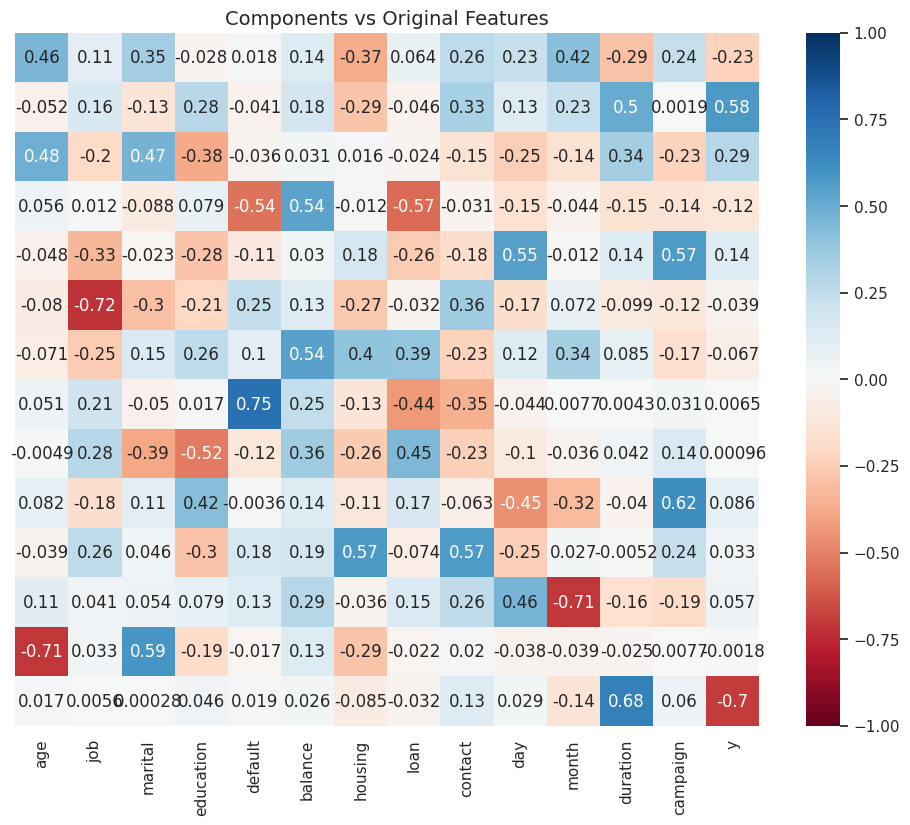

In [73]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks(np.arange(1, 15))
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

In [74]:
pca.transform(df_std)

array([[-0.32968466, -0.78495936,  1.21542441, ..., -0.26756075,
        -1.52287338,  0.06297499],
       [-1.36187058, -0.9637254 , -0.24428593, ..., -0.70558189,
        -1.25140797, -0.32088687],
       [-1.25000192, -1.68493126,  0.19899171, ..., -0.36880003,
         0.42321552, -0.63127162],
       ...,
       [ 0.46470427,  1.64452079,  3.17753504, ..., -0.17730092,
         0.48506151, -2.60937085],
       [-0.25649503,  0.67385004, -0.19777079, ..., -0.59236698,
         0.81430042,  0.56524452],
       [-0.35731996, -0.47918483, -0.06334805, ..., -0.48423172,
         0.26308974, -0.25029483]])

In [75]:

scores_pca = pca.transform(df_std)

In [76]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

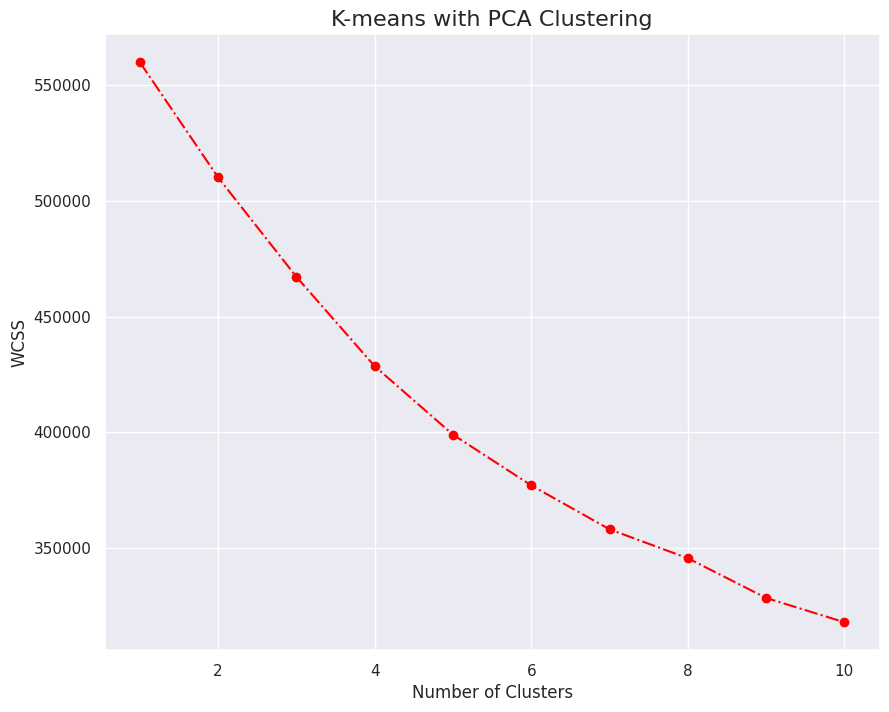

In [77]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering',fontsize = 16)
plt.show()

In [78]:
kmeans_pca = KMeans(n_clusters = 9, init = 'k-means++', random_state = 42)

In [79]:
kmeans_pca.fit(scores_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9, random_state=42)

In [85]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-14: ] = list(range(1, 15))
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [86]:


df_segm_pca_kmeans.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,...,6,7,8,9,10,11,12,13,14,Segment K-means PCA
0,58,6,1,3,0,2143,1,0,0,5,...,-0.897130,0.623159,0.669744,-0.664755,1.010427,-0.465877,-0.267561,-1.522873,0.062975,5
1,44,10,0,2,0,29,1,0,0,5,...,-1.127355,-0.651495,0.776977,0.798740,-0.186983,0.141657,-0.705582,-1.251408,-0.320887,3
2,33,5,1,2,0,2,1,1,0,5,...,-0.257107,1.143330,-0.898185,0.812709,0.690530,-0.410768,-0.368800,0.423216,-0.631272,0
3,47,4,1,0,0,1506,1,0,0,5,...,0.583816,-0.297947,0.337397,1.067784,-0.615381,0.503305,-0.693653,-0.008665,-0.589589,5
4,33,0,0,0,0,1,0,0,0,5,...,2.692551,-1.134749,0.183467,1.662996,-0.510139,-1.167465,-1.145455,0.516469,-0.184612,2


In [87]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,age,job,marital,education,default,balance,housing,loan,contact,day,...,5,6,7,8,9,10,11,12,13,14
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
0,40.682442,5.994870,0.906503,2.056429,0.000000,715.833361,0.618070,1.000000,0.758398,15.929009,...,-0.701670,-0.129021,0.817546,-1.128407,0.842543,0.233213,-0.212837,0.242492,-0.033968,0.013879
1,43.076336,5.920611,0.825954,2.332824,0.000000,17120.934351,0.499237,0.051908,0.792366,16.203053,...,0.040101,0.720749,2.980164,1.399772,1.636478,0.674247,0.860524,1.262730,0.507113,0.144513
2,48.172988,5.714203,1.107972,1.669505,0.000000,1192.805534,0.000000,0.000967,0.605263,13.813080,...,-0.199500,0.264961,-0.803616,0.329103,0.250041,0.057330,-0.696406,-0.032765,0.157349,0.154154
3,32.261080,6.233637,0.139566,2.292926,0.000000,932.330056,0.736719,0.000734,0.706927,14.978427,...,-0.096892,0.163804,-0.364531,0.080238,0.031111,-0.097789,-0.015683,0.129777,-0.185060,0.167864
4,40.869292,6.730972,0.895492,2.393296,0.000000,1339.680035,0.404859,0.000732,1.119438,20.193501,...,-0.080130,0.026535,0.023787,-0.041351,-0.517380,-0.532047,0.020325,-0.449140,0.032462,0.077938
5,42.117641,5.254462,1.149744,1.771282,0.000000,901.484000,1.000000,0.000000,0.508923,14.336615,...,0.266131,-0.264542,0.053153,0.023036,-0.419567,-0.093996,0.264069,-0.010226,0.016333,0.049330
6,39.563119,5.801980,0.866337,2.007426,1.000000,-143.405941,0.534653,0.370050,0.679455,16.361386,...,-0.825186,1.686998,0.685684,4.879778,-0.712244,-0.028151,0.973629,0.727824,-0.066568,0.066781
7,39.841519,5.948102,0.780913,2.171021,0.000000,1421.985719,0.508185,0.128527,0.884709,15.795542,...,0.538831,-0.179970,-0.250781,-0.080414,-0.008716,0.230938,0.054895,0.103713,-0.013888,-1.146835
8,40.341832,6.016997,0.821530,2.068933,0.000944,948.990557,0.511804,0.160529,0.764873,22.714825,...,2.811712,-0.591412,-0.727314,0.000449,0.527342,2.294843,0.727660,-0.684663,0.031682,0.100229
